In [1]:
import pandas as pd
import numpy
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline


# Naïve all-features regressions

## Decision Tree Regression <small> single decision tree </small>

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [48]:
mammals = pd.read_csv('mammals01.csv')
mammals.columns

Index(['Taxon', 'High_change', 'Orig_high_limit', 'Litter_size',
       'Litters_per_yr', 'Young_per_yr', 'Mass_g', 'Longevity_yrs',
       'Bio1_mean', 'Bio1_std', 'Rangesize_km2', 'Daily01', 'Annual01',
       'Food01', 'Daily_rhythm', 'Daily_rhythm_code', 'Annual_rhythm',
       'Annual_rhythm_code', 'Food', 'Food_code', 'High_change_pfa2'],
      dtype='object')

In [49]:
regressor = DecisionTreeRegressor()
features = mammals.loc[mammals["High_change_pfa2"] == 1].drop(['High_change',
                         'Annual_rhythm',
                         'Food', 
                         'Daily_rhythm',
                         'Taxon',
                         'High_change_pfa2',
                         'Daily01',
                         "Annual01"], axis=1)
# excludes above features 
print(mammals.loc[mammals['High_change_pfa2'] == 1])
target   = mammals.loc[mammals['High_change_pfa2'] == 1].High_change
regressor.fit(features, target)


                       Taxon  High_change  Orig_high_limit  Litter_size  \
0   Chaetodipus_californicus          800              914            4   
3      Microtus_californicus          505             1160            6   
7           Neotoma_macrotis           67             1646            3   
11          Peromyscus_truei          589             1220            4   
12  Reithrodontomys_megaloti          112             1160            4   
21    Tamias_quadrimaculatus           50             2210            4   
23          Tamias_speciosus           65             3155            4   

    Litters_per_yr  Young_per_yr  Mass_g  Longevity_yrs  Bio1_mean  Bio1_std  \
0                2             6      25            1.0      15.16      2.38   
3                4            24      60            0.5      14.57      2.84   
7                1             3     350            3.0      14.58      2.18   
11               2             8      30            0.5      13.61      4.05   

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [50]:
#print(features.values[0], target.values[0])
#print(regressor.predict(features.values[0]))

regressor.score(features.values, target.values)
    

1.0

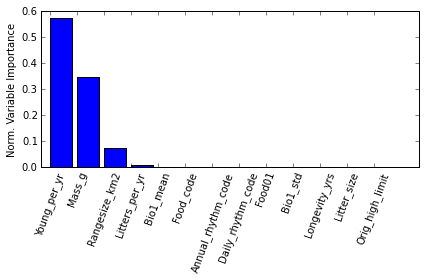

In [51]:
def importances(weights, features):
    """
    sorts features array based on weights.
    """
    sorted_importances = numpy.argsort(weights)
    return list(zip(features.columns.values[sorted_importances[::-1]],
                weights[sorted_importances[::-1]]))

def plot_importances(weights, features):
    names, values = zip(*importances(weights, features))
    fig, ax = plt.subplots()
    xlabels = numpy.arange(len(features.columns))+0.35
    ax.bar(xlabels, values)
    ax.set_ylabel("Norm. Variable Importance")
    ax.set_xticks(xlabels)
    ax.set_xticklabels(names, rotation=70)
    plt.tight_layout()
    
plot_importances(regressor.feature_importances_, features)

### Decision Tree Regression with Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
numpy.mean(cross_val_score(regressor, features, target, cv=5))

-3.2883523800512449

## Random Forest Regression <small> many decision trees </small>

In [17]:
from sklearn.ensemble import RandomForestRegressor

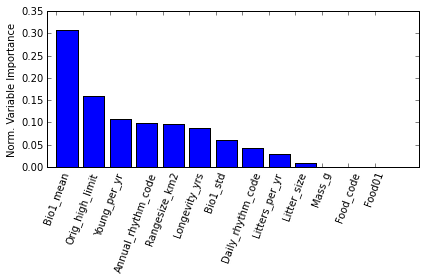

In [18]:

rfr = RandomForestRegressor()
rfr.fit(features.values, target.values)
names, values = zip(*importances(rfr.feature_importances_, features))

fig, ax = plt.subplots()
xlabels = numpy.arange(len(features.columns))+0.35
ax.bar(xlabels, values)
ax.set_xticks(xlabels)
ax.set_ylabel("Norm. Variable Importance")
ax.set_xticklabels(names, rotation=70)
plt.tight_layout()

### With Cross Validation:

In [19]:
numpy.mean(cross_val_score(rfr, features, target, cv=5))

-2.9271904021647672

## Ridge Regression <small> *linear* </small>



In [20]:
from sklearn.linear_model import Ridge, RidgeCV

In [21]:
rreg = Ridge()
rreg.fit(features.values, target.values)
list(zip(features.columns.values, rreg.coef_))
rreg.score(features.values, target.values)

0.98584342706788142

In [22]:
numpy.mean(cross_val_score(rreg, features.values, target.values))

-18181.159812595259

In [23]:
names, values = zip(*importances(rreg.coef_, features))

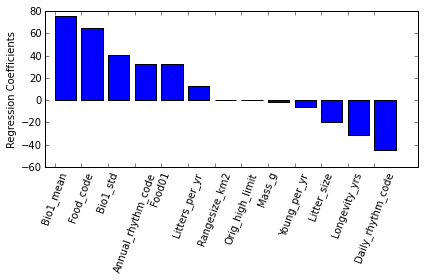

In [24]:
fig, ax = plt.subplots()
xlabels = numpy.arange(len(features.columns))+0.35
ax.bar(xlabels, values)
ax.set_xticks(xlabels)
ax.set_ylabel("Regression Coefficients")
ax.set_xticklabels(names, rotation=70)
plt.tight_layout()

## Support Vector Regression

In [25]:
from sklearn.svm import SVR
clf = SVR(C = 1e3, epsilon = 0.2, kernel='rbf') 



# Feature Choice

In [26]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import RidgeCV

features_new = SelectKBest(mutual_info_regression, k=3).fit_transform(features, target)

numpy.mean(cross_val_score(rfr, features_new, target, cv=5))


/home/condauser/anaconda3/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


-1.4967404003681519

/home/condauser/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


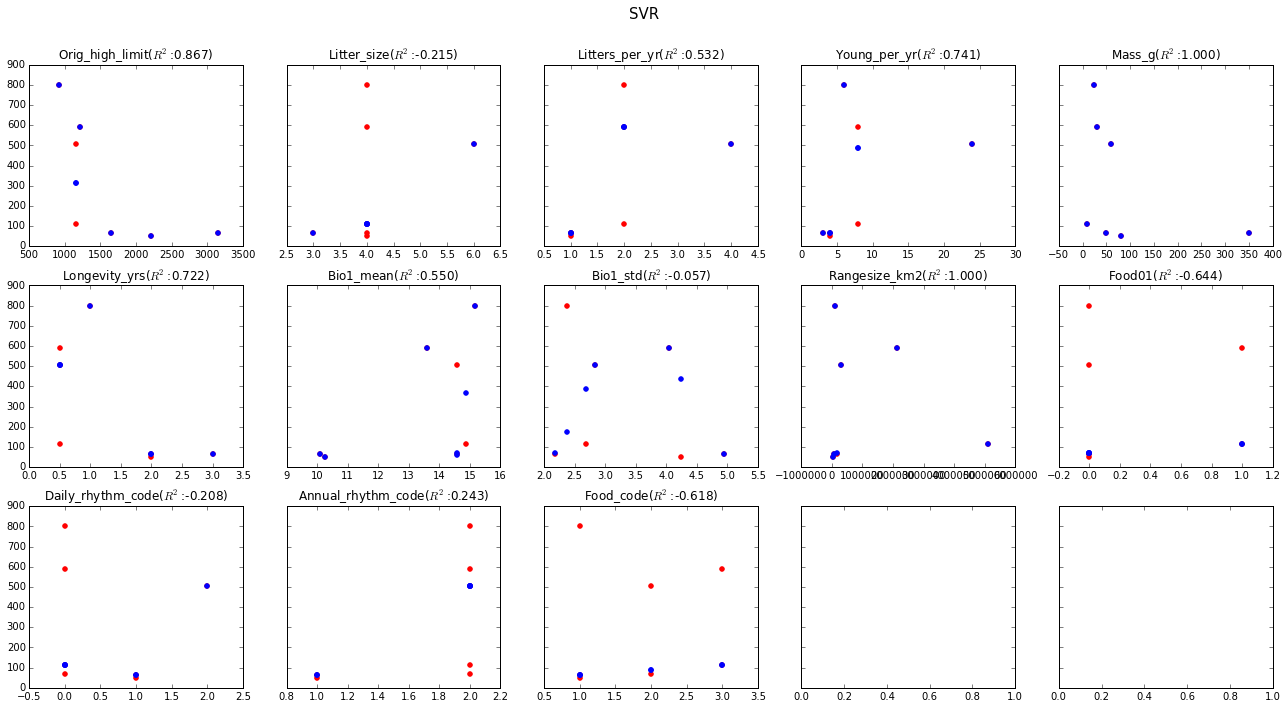

[('Orig_high_limit', -127.03330229597691), ('Litter_size', -190.22375421361284), ('Litters_per_yr', -54.980452590497357), ('Young_per_yr', -76.423003416511193), ('Mass_g', -124.37698773782927), ('Longevity_yrs', -187.72083135187623), ('Bio1_mean', -347.77244496547542), ('Bio1_std', -124.71731500860849), ('Rangesize_km2', -124.37721385022425), ('Food01', -150.79141196937454), ('Daily_rhythm_code', -169.44771386575042), ('Annual_rhythm_code', -160.24265194357093), ('Food_code', -318.39580913895315)]


/home/condauser/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


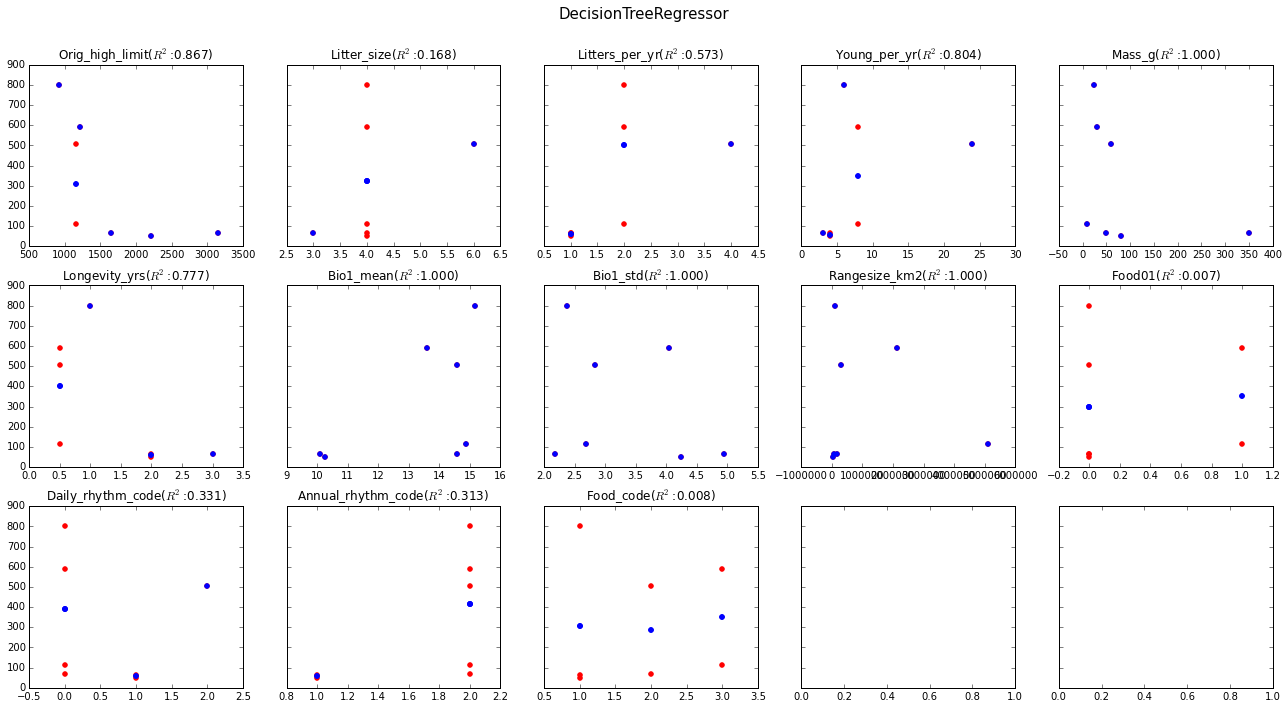

[('Orig_high_limit', -37.476272103790087), ('Litter_size', -275.70356975655613), ('Litters_per_yr', -81.640746409058721), ('Young_per_yr', -55.070602897104841), ('Mass_g', -209.3865159670157), ('Longevity_yrs', -309.18552579739895), ('Bio1_mean', -248.61811664026663), ('Bio1_std', -172.53515436596956), ('Rangesize_km2', -318.60584180066468), ('Food01', -131.50159351342572), ('Daily_rhythm_code', -121.3805291531576), ('Annual_rhythm_code', -124.20501234749825), ('Food_code', -318.55458278814166)]


/home/condauser/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


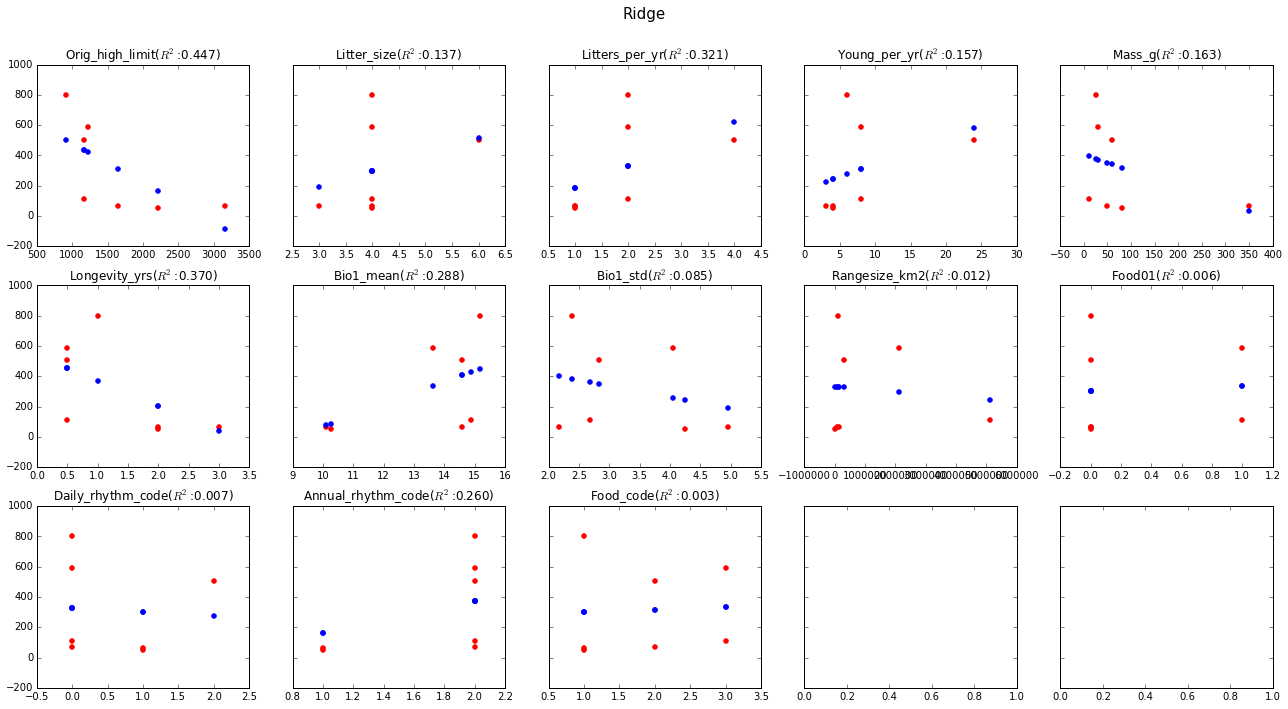

[('Orig_high_limit', -641.00521180677765), ('Litter_size', -112.98546990626731), ('Litters_per_yr', -84.719844054888611), ('Young_per_yr', -105.41250564500686), ('Mass_g', -213.24339975242714), ('Longevity_yrs', -106.20050397918949), ('Bio1_mean', -72.844973467802475), ('Bio1_std', -190.89307268745873), ('Rangesize_km2', -180.69325633232958), ('Food01', -126.74891042379127), ('Daily_rhythm_code', -125.25916771803098), ('Annual_rhythm_code', -124.32405572425307), ('Food_code', -144.30703455398836)]


/home/condauser/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


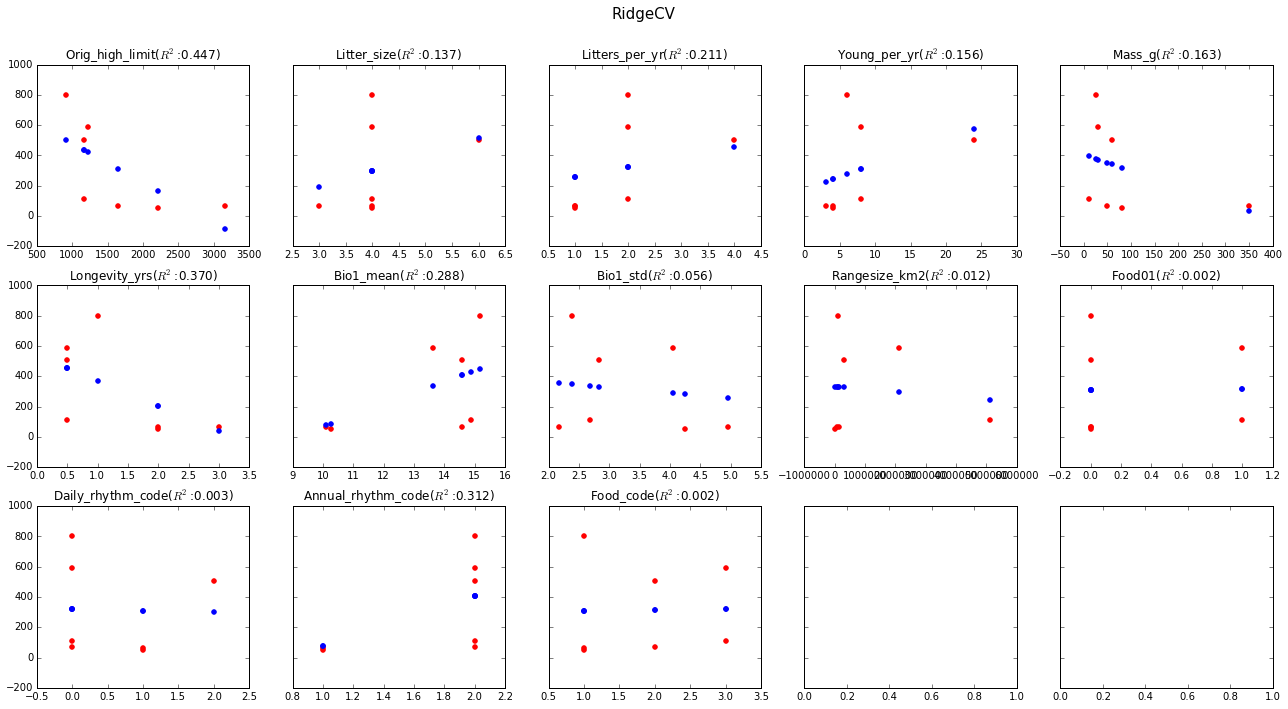

[('Orig_high_limit', -641.01043058498726), ('Litter_size', -119.88854795454515), ('Litters_per_yr', -107.57282276017455), ('Young_per_yr', -105.99701100601271), ('Mass_g', -213.23090319988796), ('Longevity_yrs', -114.80980756126668), ('Bio1_mean', -112.08414671836573), ('Bio1_std', -139.51703238701134), ('Rangesize_km2', -180.68094559551477), ('Food01', -124.72608324564052), ('Daily_rhythm_code', -124.64343597826897), ('Annual_rhythm_code', -124.23032405713433), ('Food_code', -128.69425000253483)]


In [27]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.5)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

rcv = RidgeCV()

def plotmodel(model):
    cvscores = []
    fig, axarr = plt.subplots(3, 5, sharey=True)
    fig.suptitle(str(model).split("(")[0], fontsize=15)
    fig.set_figwidth(18)
    fig.set_figheight(10)
    fig.set_dpi(200)
    featiter = iter(list(features.columns))
    for row in range(0, 3):
        for col in range(0,5):
            try:
                feat = next(featiter)
                X = features[feat].values.reshape(-1,1)
                model.fit(features[feat].values.reshape(-1,1), target)
                predictions = model.predict(features[feat].values.reshape(-1,1))
                score = model.score(features[feat].values.reshape(-1,1), target)
                axarr[row, col].scatter(features[feat],  target, color='red')
                axarr[row, col].scatter(features[feat], predictions, color='blue')
                axarr[row, col].set_title(feat + "($R^2$:" + str("%.3f" % score) + ")")
                
                cvscores.append((feat, numpy.mean(cross_val_score(model, X, target, cv=2))))
            except StopIteration:
                plt.tight_layout()
                plt.subplots_adjust(top=0.90)
                plt.show()
                print(cvscores)
                break


for m in [svr_rbf, regressor, rreg, rcv]:
    plotmodel(m)




# Generalized Linear Models